# 數位訊號處理 Digital Signal Processing

## 諧波 Harmonics

In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

### 波形與諧波 Waveforms and harmonics

> 訊號與波形創建 Signal and wave creation

產生一個200Hz的三角訊號，並繪製三個周期的波段 Create a triangle signal and plot a 3 period segment.

0.015


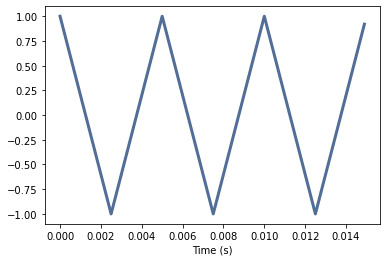

In [2]:
signal = thinkdsp.TriangleSignal(200)
duration = signal.period*3 # Make it longer to take a good look at it.
print(duration)
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
thinkplot.config(xlabel='Time (s)')

創建一個波形物件，並播放之 Make a wave and play it.

In [3]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

> 頻譜計算與繪製 Compute its spectrum and plot it.

計算其頻譜並繪製頻譜圖，峰值出現在200Hz, 600Hz, 1000Hz, 1400Hz, ...(基頻200Hz的**奇數倍**) The peaks occur at 200Hz, 600Hz, 1000Hz, 1400Hz, ...(**odd multiples** of the fundamental frequency 200Hz).

基本頻率的定義是最低頻率 Fundamental frequency is the lowest frequency.

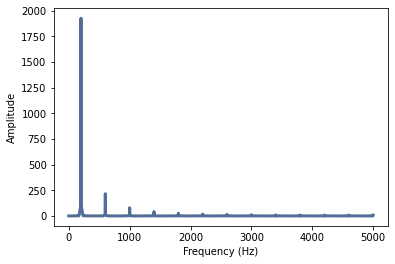

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

### 諧波結構

諧波的振幅與頻率存在著關係，振幅以頻率比率之平方遞減 Another feature of this spectrum is the relationship between the amplitude and frequency of the harmonics. Their amplitude drops off in proportion to frequency squared. For example the frequency ratio of the first two har- monics (200 and 600 Hz) is 3, and the amplitude ratio is approximately 9. The frequency ratio of the next two harmonics (600 and 1000 Hz) is 1.7, and the amplitude ratio is approximately $1.7^2 = 2.9$. This relationship is called the harmonic structure.

產生一個100Hz的方形訊號，並繪製三個周期的波段 Make a square signal and plot a 3 period segment.

0.01


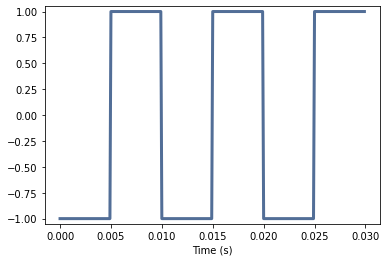

In [5]:
signal = thinkdsp.SquareSignal(100)
duration = signal.period*3
print(signal.period)
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
thinkplot.config(ylim=[-1.05, 1.05], legend=False)
thinkplot.config(xlabel='Time (s)')

創建一個波形物件，並播放之 Make a wave and play it.

In [6]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

> 頻譜計算與繪製 Compute its spectrum and plot it.

計算其頻譜並繪製頻譜圖，峰值出現在100Hz, 300Hz, 500Hz, 700Hz, 900Hz, 1100Hz...(也是基頻100Hz的**奇數倍**) The peaks occur at 100Hz, 300Hz, 500Hz, 700Hz, ...(**odd multiples** of the fundamental frequency 100Hz).

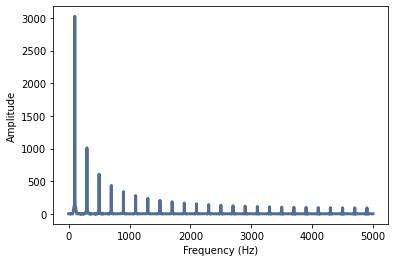

In [7]:
spectrum = wave.make_spectrum()
spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

> 方形諧波的振幅，較三角諧波下降的慢 The harmonics of square signal drops off more slowly than that of triangle signal.

產生一個200Hz的鋸齒形訊號，並繪製三個周期的波段 Create a sawtooth signal and plot a 3 period segment.

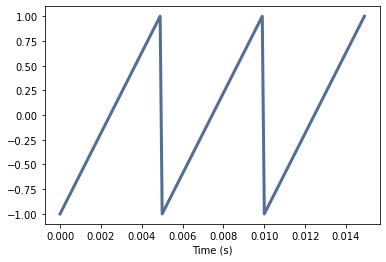

In [8]:
signal = thinkdsp.SawtoothSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
thinkplot.config(xlabel='Time (s)')

創建一個波形物件，並播放之 Make a wave and play it.

In [9]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

> 頻譜計算與繪製 Compute its spectrum and plot it.

計算其頻譜並繪製頻譜圖，峰值出現在200Hz, 600Hz, 1000Hz, 1400Hz, ...(基頻200Hz的**奇數倍**) The peaks occur at 200Hz, 600Hz, 1000Hz, 1400Hz, ...(**odd multiples** of the fundamental frequency 200Hz).

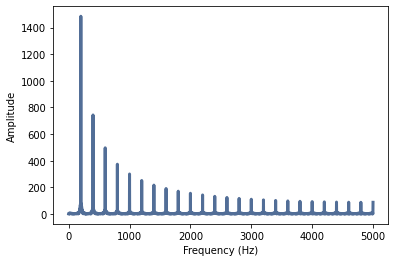

In [10]:
spectrum = wave.make_spectrum()
spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

### 混疊 Aliasing: The misidentification of a signal frequency, introducing distortion error (sampling error). 扭曲誤差或抽樣誤差

因為波(離散的)是訊號(連續的)取樣的結果，所以樣本之間的訊息有可能流失。
低頻波比較不會產生問題，因為每個周期中有許多樣本，但是高頻波(周期短！)因為樣本不足，就會產生混疊的狀況了！ when you evaluate the signal at discrete points in time, you lose information about what happened between samples. For low fre- quency components, that’s not a problem, because you have lots of samples per period.

產生一個頻率為4500Hz的餘弦訊號(無限訊號)，以10000Hz的取樣率(framerate)抽取其波形，並繪製5個週期的波形圖 Make a cosine signal at 4500 Hz, make a wave at framerate 10 kHz, and plot 5 periods.

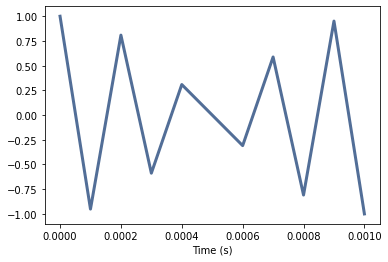

In [11]:
framerate = 10000

signal = thinkdsp.CosSignal(4500)
duration = signal.period*5
segment = signal.make_wave(duration, framerate=framerate)
segment.plot()
thinkplot.config(xlabel='Time (s)')

### 波形與上圖完全相同！

產生一個頻率為5500Hz的餘弦訊號(無限訊號)，以10000Hz的取樣率(framerate)抽取其波形，並繪製5個週期的波形圖 Make a cosine signal at 5500 Hz, make a wave at framerate 10 kHz, and plot the same duration.

當取樣率為10kHz時，可量測的最高頻率為取樣率的一半5kHz(稱之為folding頻率，或奈奎斯Nyquist頻率)，因此4500 Hz與5500 Hz的訊號看起來一樣 With framerate 10 kHz, the folding frequency is 5 kHz, so a 4500 Hz signal and a 5500 Hz signal look exactly the same.

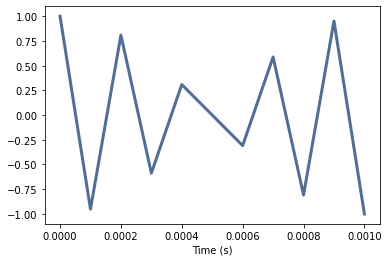

In [12]:
signal = thinkdsp.CosSignal(5500)
segment = signal.make_wave(duration, framerate=framerate)
segment.plot()
thinkplot.config(xlabel='Time (s)')

**訊號不同，但取樣的結果居然完全一樣！ Signals are different but the samplig results are the same!**

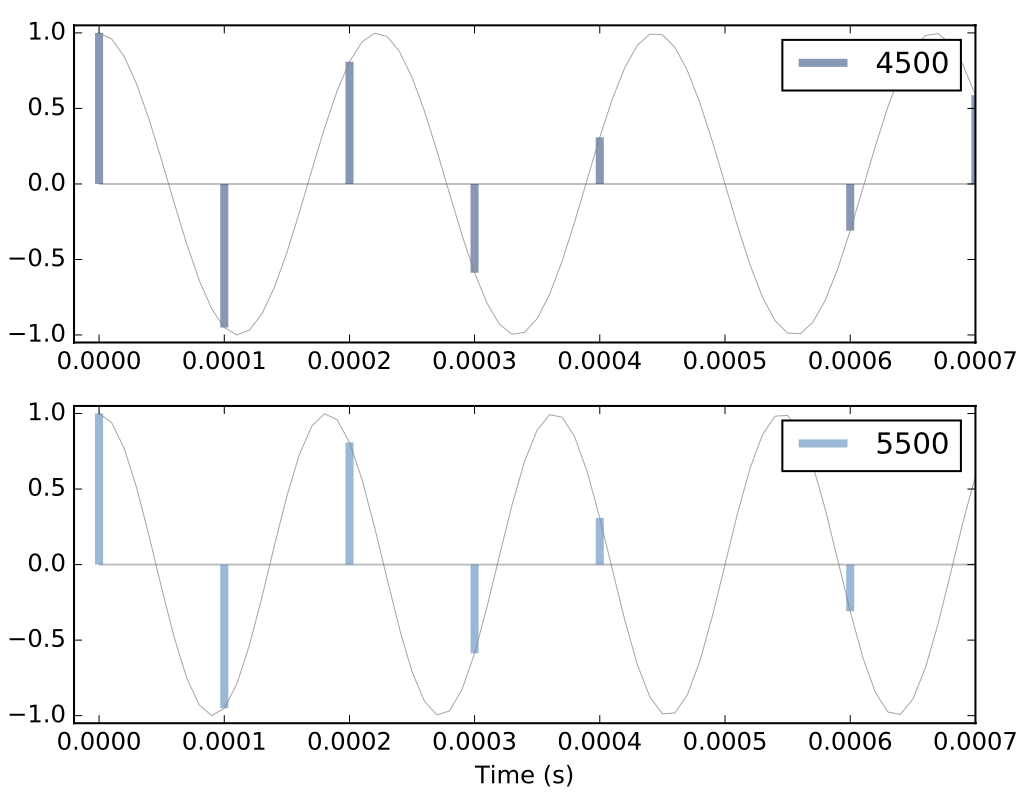

In [13]:
from IPython.display import Image
Image(filename='./aliasing.png')

> 確實瞭解訊號混疊 Understanding the aliasing

產生一個1100Hz的三角訊號，觀察諧波如何混疊的 Make a triangle signal and plot the spectrum.  See how the harmonics get folded.

1100Hz, 3300Hz, 5500Hz, 7700Hz, 9900Hz, 12100Hz

1100Hz, 3300Hz, *4500Hz*, *2300Hz*, *100Hz*, **2100Hz** (12100Hz folded at -2100Hz by 5000Hz, but get folded again by 0Hz and back to 2100Hz)

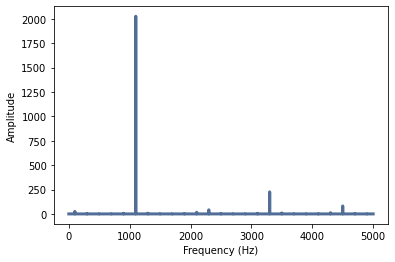

In [14]:
signal = thinkdsp.TriangleSignal(1100)
segment = signal.make_wave(duration=0.5, framerate=10000)
spectrum = segment.make_spectrum()
spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

## 振幅與相位角 Amplitude and phase

產生一個500Hz的鋸齒形訊號，並繪製三個周期的波段 Create a sawtooth signal and plot a 3 period segment. Make a sawtooth wave.

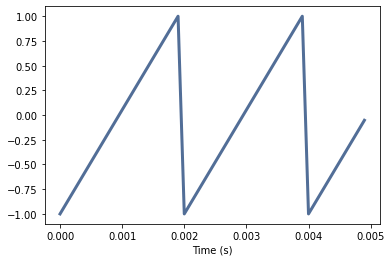

In [15]:
signal = thinkdsp.SawtoothSignal(500)
wave = signal.make_wave(duration=1, framerate=10000)
segment = wave.segment(duration=0.005)
segment.plot()
thinkplot.config(xlabel='Time (s)')

播放之 Play it.

In [16]:
wave.make_audio()

> 傅立葉轉換

提取快速傅立葉轉換(Fast Fourier Transform, FFT)的振幅與相位角(`rfft`是針對實數訊號優化後的FFT計算函數) Extract the wave array and compute the real FFT (which is just an FFT optimized for real inputs).

In [17]:
import numpy as np

hs = np.fft.rfft(wave.ys)
hs

array([ 5.11590770e-13+0.00000000e+00j,  2.19700679e-13-1.34559298e-13j,
       -2.09548671e-13-6.74603523e-14j, ...,
        4.19606174e-13+3.46000979e-14j, -5.63280756e-13+5.74915022e-14j,
       -5.26315789e+02+0.00000000e+00j])

In [18]:
print(wave.ys.shape) # N = 10000
print(hs.shape) # N/2 + 1 = 5001

(10000,)
(5001,)


計算與FFT元素匹配的頻率 Compute the frequencies that match up with the elements of the FFT.

In [19]:
n = len(wave.ys)                 # number of samples
d = 1 / wave.framerate           # time between samples
fs = np.fft.rfftfreq(n, d)
fs

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 4.998e+03, 4.999e+03,
       5.000e+03])

In [20]:
print(fs.shape)

(5001,)


> 兩種頻譜圖 Two types of spectrum plots

繪製振幅 vs. 頻率的頻譜圖 Plot the magnitudes vs the frequencies.

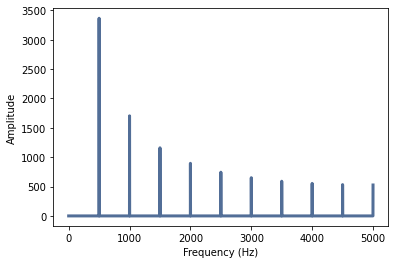

In [21]:
magnitude = np.absolute(hs) # 求複數的振幅
thinkplot.plot(fs, magnitude)
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Amplitude')

繪製相位 vs. 頻率的頻譜圖 Plot the phases vs the frequencies.

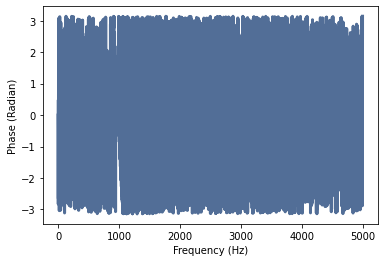

In [22]:
angle = np.angle(hs) # 傳回複數的相位角
thinkplot.plot(fs, angle)
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Phase (Radian)')

## 變動相位角前後的聲音 What does phase sound like?

相位角重組 Shuffle the phases.

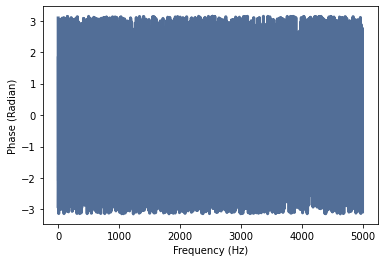

In [23]:
import random
random.shuffle(angle) # 重新洗牌函數
thinkplot.plot(fs, angle)
thinkplot.config(xlabel='Frequency (Hz)', ylabel='Phase (Radian)')

相位角重組後的訊號再產生其頻譜，$hs = Ae^{i\phi}$是具有振幅A與相位角$\phi$的複數

Put the shuffled phases back into the spectrum.  Each element in `hs` is a complex number with magitude $A$ and phase $\phi$, with which we can compute $A e^{i \phi}$

In [24]:
i = complex(0, 1)
print(i)
spectrum = wave.make_spectrum()
spectrum.hs = magnitude * np.exp(i * angle)

1j


> 逆傅立葉轉換

頻譜再轉回時間波形(使用`irfft`逆傅立葉轉換函數) Convert the spectrum back to a wave (which uses irfft).

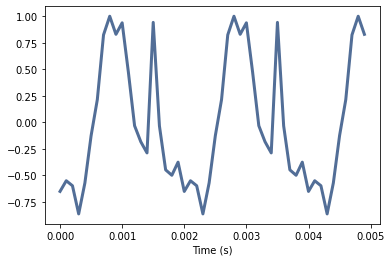

In [25]:
wave2 = spectrum.make_wave()
wave2.normalize()
segment = wave2.segment(duration=0.005)
segment.plot()
thinkplot.config(xlabel='Time (s)')

播放相位重組後的聲波 Play the wave with the shuffled phases.

In [26]:
wave2.make_audio()

與重組前的聲波相比 For comparison, here's the original wave again.

In [27]:
wave.make_audio()

儘管兩訊號有不同的波形，但是它們有相同振幅的頻率成份，因此區別僅在相位角 Although the two signals have different waveforms, they have the same frequency components with the same amplitudes.  They differ only in phase.

## 混疊的交互作用 Aliasing interaction

下面互動式滑桿與圖形，探索鋸齒訊號諧波的混疊效應 The following interaction explores the effect of aliasing on the harmonics of a sawtooth signal.

In [28]:
def view_harmonics(freq, framerate):
    signal = thinkdsp.SawtoothSignal(freq)
    wave = signal.make_wave(duration=0.5, framerate=framerate)
    spectrum = wave.make_spectrum()
    spectrum.plot(color='blue') # 頻譜圖 spectrum plot
    thinkplot.show(xlabel='frequency', ylabel='amplitude')
    
    display(wave.make_audio())

In [29]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider1 = widgets.FloatSlider(min=100, max=10000, value=100, step=100)
slider2 = widgets.FloatSlider(min=5000, max=40000, value=10000, step=1000)
interact(view_harmonics, freq=slider1, framerate=slider2);

interactive(children=(FloatSlider(value=100.0, description='freq', max=10000.0, min=100.0, step=100.0), FloatS…

拉高取樣率也同時提高了摺疊頻率，因此高頻部分不會出現混疊狀況

Raising the framerate, also the folding frequency, the high-frequency part will not be aliasing.

### 參考文獻：

Downey, A.B. (2014), Think DSP: Digital Signal Processing in Python, Green Tea Press.

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)